# Final Assessment Scratch Pad

## Instructions

1. Please use only this Jupyter notebook to work on your model, and **do not use any extra files**. If you need to define helper classes or functions, feel free to do so in this notebook.
2. This template is intended to be general, but it may not cover every use case. The sections are given so that it will be easier for us to grade your submission. If your specific use case isn't addressed, **you may add new Markdown or code blocks to this notebook**. However, please **don't delete any existing blocks**.
3. If you don't think a particular section of this template is necessary for your work, **you may skip it**. Be sure to explain clearly why you decided to do so.

##### Overview
I have created my model by emplying the basic preprocessing techniques and running a very simple model, after which I continuously augment and preprocess my data further while fine tuning my model to give the best results.

##### 1. Descriptive Analysis
I printed the max and min of the image dataset to view the range of values. Additionally, I printed the number of labels for preprocessing later on.

##### 2. Detection and Handling of Missing Values
I printed the number of missing values in X and y. Samples with missing y value (label) will be redundant in a supervised learning neural network model, hence they were removed from the dataset.
Since the number of missing values in X is too high, we cannot remove samples containing them. Fortunately, there is no sample where then number of missing values is too high (>30), hence I have decided to fill them wih the mean of that respective channel and image. 

##### 3. Detection and Handling of Outliers
The data were provided as image samples containing channels of pixels. Thus, integer values should range from 0 to 255. I have decided to clip them to minimum 0 and maximum 255 given the context of the problem.

##### 4. Detection and Handling of Class Imbalance 
Class imbalance was evident in this dataset where class 0 dominated the other 2. There were several ways I approached this issue. 
Firstly, I chose oversampling over undersampling as the minority classes had too few samples, especially for deep learning neural networks which required a huge dataset to be effective. I did the naive approach of oversampling classes 1 and 2 to match the number of samples of class 0 by duplicating the samples of minority classes. While SMOTE techniques may have been more effective at replicating data of minority classes, I do not have access to imbalanced-learning library. 
After creating the model, I realised that image augmentation techniques like rotating and flipping are applicable here. The minority classes can be filled with augmented samples of the current minority classes and will allow my model to generalise better to these classes. This is evident in the increase in f1 score of my model.

##### 5. Understanding Relationship Between Variables
To understand the relationship, I created a correlation matrix of the images. However, it was not very useful since each data represents pixels.

##### 6. Data Visualization
I tried to display image of each sample but it was not useful.

##### 7. General Preprocessing
Other preprocessing techniques I employed was normalization, where pixel values were divided by 255. This improves convergence speed of the model since it is a gradient-based optimisation model.
 
##### 8. Feature Selection 
Feature selection techniques like PCA may not be very useful here as neural networks are already able to effectively handle large number of features and automatically determine the hierachical ordering of the features. Employing these techniques may only result in overhead costs with no added efficiency or even worse, loss of information.

##### 9. Feature Engineering
Data augmentation explained in point 4 to create more samples can be considered as feature engineering for more accurate results.

##### 10. Creating Models
I employed a simple CNN model whereby a mixture of Conv2d, Maxpool2d, ReLU and Linear layers were used in the architecture. Convolutional layers were used to slide across the image to recognise if there is any apparent pattern or feature that is detectable, after which ReLU activation layers were used for non-linearity. Maxpooling was also utilised as it could help by downsampling and reducing the dimensions, lightening the load on the network. The data then passes through the 2 fully connected layers of neurons and the final output size is 3 to match the number of classes.
As I have limited knowledge on the architecture capabilities and advanced models will use up too much computational resources, I only tested this CNN model and another CNN model with dropout.
For model training, optimiser adam and cross entropy loss was used, similar to that of earlier problem sets.

##### 11. Model Evaluation
I only employed 2 models for evaluations, which are my original CNN model and CNN with dropout model. While both were effective in achieving a high f1 score, my original CNN model consistently outperformed CNN with dropout model, hence I have decided to stick to the former.

##### 12. Hyperparameters Search
Hyperparameters that were considered for testing are learning rates, number and size of hidden layers and activation function. I employed grid search for hyperparameter search and best results were 2 layers, 0.01 learning rate and ReLU activation function.
Additionally, learning rates were changed marginally and the loss after each epoch was printed out for me to visually inspect the effectiveness of change. This also allows me to determine the best value for number of epochs that will allow the model to converge without using too much resources

##### Conclusion
In conclusion, tackling this problem set required knowledge from all of the previous problem sets combined. Oversampling and data augmentation were skills imbued into me in ps7 and I was able to judge which techniques were more effective. Additionally, employing CNN for deep learning was challenging given the myraid of factors and choices I had to consider. There isn't a one-size-fit-all solution to this problem and this final model is one I have created with thorough experimentation, testing and consideration for the context of the problem.

## Report

---

# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done. 

## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).

In [567]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import collections
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

## Load Dataset

The dataset `data/images.npy` is of size $(N, C, H, W)$, where $N$, $C$, $H$, and $W$ correspond to the number of data, image channels, image width, and image height, respectively.

A code snippet that loads the data is provided below.

### Load Image Data

In [568]:
with open('data.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True).item()
    images = data['image']
    labels = data['label']
    
print('Shape:', images.shape)

Shape: (2911, 3, 16, 16)


## Data Exploration & Preparation

### 1. Descriptive Analysis

In [569]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)
print(collections.Counter(labels))
print(np.nanmax(images))
print(np.nanmin(images))

Counter({0.0: 2392, 1.0: 203, 2.0: 25, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, n

### 2. Detection and Handling of Missing Values

In [570]:
print(np.isnan(X_train).sum()) #too many to remove samples
print(np.isnan(y_train).sum())
print(np.where(np.sum(np.isnan(X_train), axis=(1,2,3)) > 30)) #0

nanarr = np.isnan(y_train)
y_train = np.delete(y_train, nanarr)
X_train = np.delete(X_train, nanarr, axis=0)

nanarr = np.isnan(y_test)
y_test = np.delete(y_test, nanarr)
X_test = np.delete(X_test, nanarr, axis=0)

for image in X_train:
    for channel in image:
        np.nan_to_num(image, copy=False, nan=np.nanmean(channel))

for image in X_test:
    for channel in image:
        np.nan_to_num(image, copy=False, nan=np.nanmean(channel))

16591
223
(array([], dtype=int64),)


/Users/ondre/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### 3. Detection and Handling of Outliers

In [571]:
X_train = np.clip(X_train, 0, 255)
X_test = np.clip(X_test, 0, 255)

### 4. Detection and Handling of Class Imbalance

In [572]:
n0 = np.count_nonzero(y_train == 0)
n1 = np.count_nonzero(y_train == 1)
n2 = np.count_nonzero(y_train == 2)

i1 = np.ndarray.flatten(np.array(np.where(y_train == 1)))
i2 = np.ndarray.flatten(np.array(np.where(y_train == 2)))

indices1 = np.random.choice(i1, n0 - n1, replace=True)
indices2 = np.random.choice(i2, n0 - n2, replace=True)

# X_train = np.concatenate([X_train, X_train[indices1], X_train[indices2]], axis=0)
y_train = np.concatenate([y_train, y_train[indices1], y_train[indices2]], axis=0)

transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(), 
])

X_tensor = torch.tensor(X_train, dtype=torch.float32)

augmented_imgs = []

for i in indices1:
    augmented_imgs.append(transform(X_tensor[i]))

for i in indices2:
    augmented_imgs.append(transform(X_tensor[i]))

augmented_data = torch.stack(augmented_imgs)

X_tensor = torch.cat([X_tensor, augmented_data])
y_tensor = torch.tensor(y_train, dtype=torch.long)



### 5. Understanding Relationship Between Variables

In [573]:
pd.DataFrame(X_train.reshape(X_train.shape[0], 768)).corr()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,1.000000,0.811828,-0.013120,-0.126637,-0.010793,-0.005413,-0.010508,0.018146,0.026122,0.016918,...,0.027124,-0.004464,0.031798,0.041292,0.007249,-0.008026,-0.034427,0.024370,0.010838,-0.067451
1,0.811828,1.000000,0.425961,0.187306,-0.058447,-0.050554,-0.004171,0.007502,0.008589,0.011927,...,0.003654,-0.031993,0.033038,0.049700,-0.017026,-0.007230,-0.044260,0.017762,0.006482,-0.073475
2,-0.013120,0.425961,1.000000,0.666662,-0.022414,-0.064303,0.001941,-0.002567,-0.001350,0.011261,...,-0.030620,-0.023429,0.019626,0.033929,-0.034616,-0.014785,-0.042216,-0.000154,-0.015475,-0.012182
3,-0.126637,0.187306,0.666662,1.000000,0.573423,0.226178,-0.079671,-0.039492,0.006822,0.016747,...,0.010456,-0.002760,-0.002907,0.034606,-0.044391,-0.001801,-0.041651,-0.007122,-0.005623,0.005147
4,-0.010793,-0.058447,-0.022414,0.573423,1.000000,0.505247,0.001163,-0.013225,0.005651,-0.004748,...,0.028643,-0.032153,-0.025641,0.014317,-0.023203,0.005943,-0.034578,-0.004804,0.010781,0.011147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-0.008026,-0.007230,-0.014785,-0.001801,0.005943,-0.009094,-0.014840,0.028430,0.028841,-0.009905,...,-0.012398,0.035155,-0.019344,-0.016566,-0.028510,1.000000,0.043738,0.024661,-0.010145,0.014471
764,-0.034427,-0.044260,-0.042216,-0.041651,-0.034578,-0.002900,0.016864,0.014948,0.010860,-0.036161,...,-0.013859,0.009284,0.003307,-0.002169,0.016422,0.043738,1.000000,-0.015670,-0.025269,-0.016287
765,0.024370,0.017762,-0.000154,-0.007122,-0.004804,-0.022666,-0.024483,0.022693,0.020411,-0.001285,...,-0.012251,0.010685,0.028589,-0.000579,-0.010000,0.024661,-0.015670,1.000000,0.008342,0.029700
766,0.010838,0.006482,-0.015475,-0.005623,0.010781,-0.022815,-0.042358,-0.037637,-0.023273,-0.002566,...,-0.014601,-0.013886,-0.019750,0.031450,0.054847,-0.010145,-0.025269,0.008342,1.000000,0.001482


### 6. Data Visualization

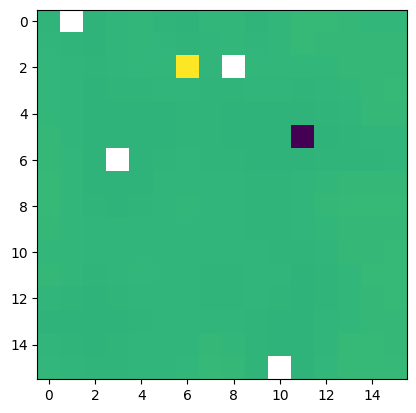

In [574]:
plt.imshow(images[0][0])

## Data Preprocessing

### 7. General Preprocessing

In [575]:
X_tensor = X_tensor/255

### 8. Feature Selection

### 9. Feature Engineering

## Modeling & Evaluation

### 10. Creating models

In [576]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
def train_model(loader, model):
    
    optimiser = torch.optim.Adam(model.parameters(), lr = 1e-2) 
    loss_fn = torch.nn.CrossEntropyLoss()  

    epoch_losses = []
    for i in range(30):
        epoch_loss = 0
        
        for idx, data in enumerate(loader):
            x, y = data

            optimiser.zero_grad()
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimiser.step()

            epoch_loss += loss

        epoch_loss = epoch_loss / len(loader)
        epoch_losses.append(epoch_loss)
        print ("Epoch: {}, Loss: {}".format(i, epoch_loss))
        
    return model

# class DropoutCNN(nn.Module):
#     def __init__(self):
#         super(DroutCNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
#         self.relu1 = nn.ReLU()
#         self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
#         self.relu2 = nn.ReLU()
#         self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

#         self.flatten = nn.Flatten()

#         # Apply dropout to the fully connected layers
#         self.fc1 = nn.Linear(64 * 4 * 4, 128)
#         self.dropout = nn.Dropout(p=0.5)
#         self.relu3 = nn.ReLU()

#         self.fc2 = nn.Linear(128, 3) 

    # def forward(self, x):
    #     x = self.maxpool1(self.relu1(self.conv1(x)))
    #     x = self.maxpool2(self.relu2(self.conv2(x)))
    #     x = self.flatten(x)

    #     # Apply dropout before the first fully connected layer
    #     x = self.dropout(self.relu3(self.fc1(x)))

    #     x = self.fc2(x)
    #     return x
    
class SimpleCNN(nn.Module):
        def __init__(self):
            super(SimpleCNN, self).__init__()
            self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
            self.relu = nn.ReLU()
            self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
            self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
            self.fc1 = nn.Linear(64 * 4 * 4, 64)
            self.fc2 = nn.Linear(64, 3)

        def forward(self, x):
            x = self.relu(self.conv1(x))
            x = self.maxpool(x)
            x = self.relu(self.conv2(x))
            x = self.maxpool(x)
            x = x.view(-1, 64 * 4 * 4)
            x = self.relu(self.fc1(x))
            x = self.fc2(x)
            return x
            


### 11. Model Evaluation

In [577]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

# X_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_tensor = torch.tensor(y_train, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=128, shuffle=True)

test_tensor = torch.tensor(X_test, dtype=torch.float32)

model = train_model(loader, SimpleCNN())
y_pred = model.forward(test_tensor)
y_pred = torch.argmax(y_pred, axis=1)

print("F1 Score (macro): {0:.2f}".format(f1_score(y_test, y_pred, average='macro'))) # You may encounter errors, you are expected to figure out what's the issue.

Epoch: 0, Loss: 0.8969213366508484
Epoch: 1, Loss: 0.21801592409610748
Epoch: 2, Loss: 0.1376160830259323
Epoch: 3, Loss: 0.10047291219234467
Epoch: 4, Loss: 0.07239808887243271
Epoch: 5, Loss: 0.07328108698129654
Epoch: 6, Loss: 0.047382958233356476
Epoch: 7, Loss: 0.03596659004688263
Epoch: 8, Loss: 0.02296442724764347
Epoch: 9, Loss: 0.024021951481699944
Epoch: 10, Loss: 0.022847536951303482
Epoch: 11, Loss: 0.00797217059880495
Epoch: 12, Loss: 0.013324185274541378
Epoch: 13, Loss: 0.03835529834032059
Epoch: 14, Loss: 0.025032324716448784
Epoch: 15, Loss: 0.026665616780519485
Epoch: 16, Loss: 0.022218773141503334
Epoch: 17, Loss: 0.008415067568421364
Epoch: 18, Loss: 0.010961787775158882
Epoch: 19, Loss: 0.009696359746158123
Epoch: 20, Loss: 0.0048818280920386314
Epoch: 21, Loss: 0.0021836250089108944
Epoch: 22, Loss: 0.005443689879029989
Epoch: 23, Loss: 0.015661148354411125
Epoch: 24, Loss: 0.0461697056889534
Epoch: 25, Loss: 0.053487628698349
Epoch: 26, Loss: 0.010371238924562931

### 12. Hyperparameters Search

In [582]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes' : [(50,), (100,), (50,50), (100,50)],
    'activation': ['relu','tanh'],
    'alpha' : [0.0001, 0.001, 0.01]
}

mlp = MLPClassifier(max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_tensor.reshape(X_tensor.shape[0], 768), y_tensor)

grid_search.best_params_


{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50)}